In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_wine
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game
warnings.filterwarnings('ignore')

In [113]:
# reading data from csv and loading it
dataset=pd.read_csv("RTA Dataset.csv")

1 - Data Cleaning

In [71]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [73]:
#checking missing values
dataset.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [74]:
#dropping columns with high number of missing values and cols which dont show much info for classification
dataset.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Sex_of_casualty','Age_band_of_casualty'], axis = 1, inplace = True)

In [75]:
dataset.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [76]:
categorical = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [77]:
#for categorical values we can replace the null values with Unknown
for i in categorical:
    dataset[i].fillna('Unknown',inplace=True)

In [78]:
#now no null values should be in cols
dataset.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [79]:
#checking col driving experience
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [80]:
for index, row in dataset.loc[:, ['Driving_experience']].iterrows():
    if(row['Driving_experience']=='unknown'):
        dataset.loc[index, 'Driving_experience'] = 'Unknown'

In [81]:
#removed small case unknowns
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [82]:
#checking col Type_of_vehicle
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [83]:
#cleaning type of vehicle column
for index, row in dataset.loc[:, ['Type_of_vehicle']].iterrows():
    if(row['Type_of_vehicle']=='Public (> 45 seats)' or row['Type_of_vehicle']=='Public (12 seats)' or row['Type_of_vehicle']=='Public (13?45 seats)'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Public'
    if(row['Type_of_vehicle']=='Lorry (41?100Q)' or row['Type_of_vehicle']=='Lorry (11?40Q)' or row['Type_of_vehicle']=='Long lorry'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Lorry'

In [84]:
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', 'Unknown', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [85]:
#cleaning keyword na from rows to Unknown
for col in dataset.columns:
    for index, row in dataset.loc[:, [col]].iterrows():
        if(row[col]=='na'):
            dataset.loc[index, col] = 'Unknown'

In [86]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,...,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [87]:
# convert object type column into datetime datatype column
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [88]:
dataframe = dataset.copy()
dataframe['Hour_of_Day'] = dataframe['Time'].dt.hour
dataframe = dataframe.drop('Time', axis=1)
dataframe.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Unknown,...,Collision with roadside-parked vehicles,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,Undivided Two way,...,Vehicle with vehicle collision,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,other,...,Collision with roadside objects,2,2,Going straight,Driver or rider,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,other,...,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,other,...,Vehicle with vehicle collision,2,2,Going straight,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


2 - Data Exploration

In [89]:
#Target Variable Classification
print(dataframe['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

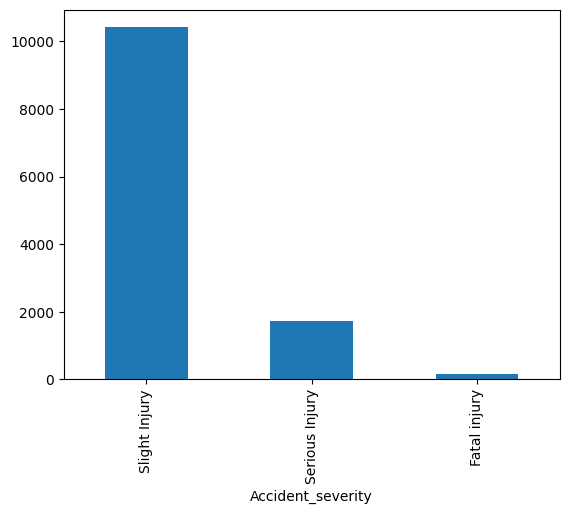

In [90]:
dataframe['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

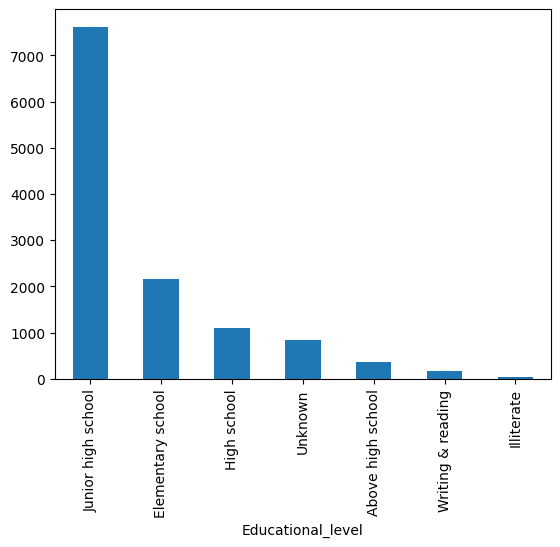

In [91]:
dataframe['Educational_level'].value_counts().plot(kind='bar')

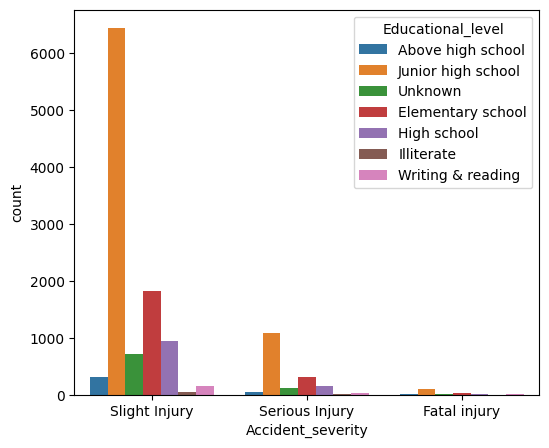

In [92]:
# Educational level with accident severity
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_severity', data=dataframe,  hue="Educational_level")
plt.xticks(rotation=0)
plt.show()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

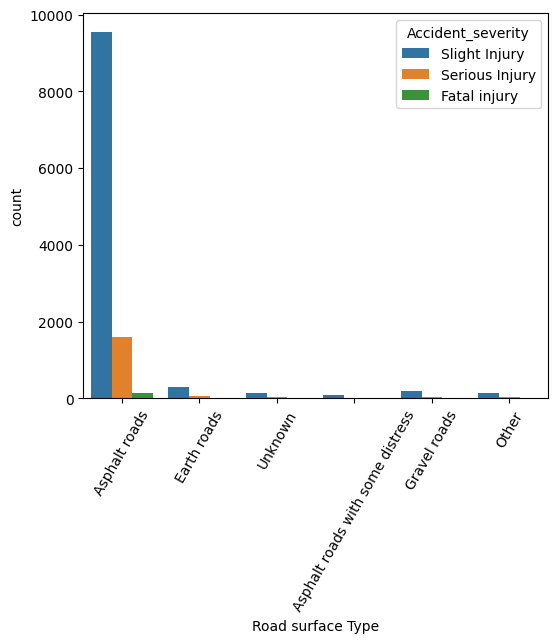

In [93]:
# Road Surface type with accident severity
print(dataframe['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=dataframe)
plt.xlabel('Road surface Type')
plt.xticks(rotation=60)
plt.show

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

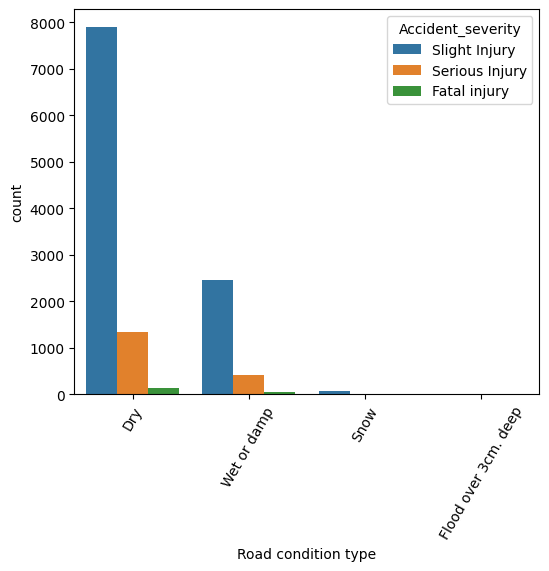

In [94]:
# Road Surface conditions with accident severity
print(dataframe['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=dataframe)
plt.xlabel('Road condition type')
plt.xticks(rotation=60)
plt.show

In [95]:
#data values for road surface type
dataframe_pivot_table = pd.pivot_table(data=dataframe, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')
road_surface_df = dataframe_pivot_table['Road_surface_type']
road_surface_df.fillna(0, inplace=True)
road_surface_df['sum of injuries'] = road_surface_df['Fatal injury'] + road_surface_df['Serious Injury'] + road_surface_df['Slight Injury']
road_surface_df


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum of injuries
Road_surface_conditions,,,,
Dry,121.0,1332.0,7887.0,9340.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,66.0,70.0
Wet or damp,37.0,407.0,2460.0,2904.0


Data Visualization for all categorical cols

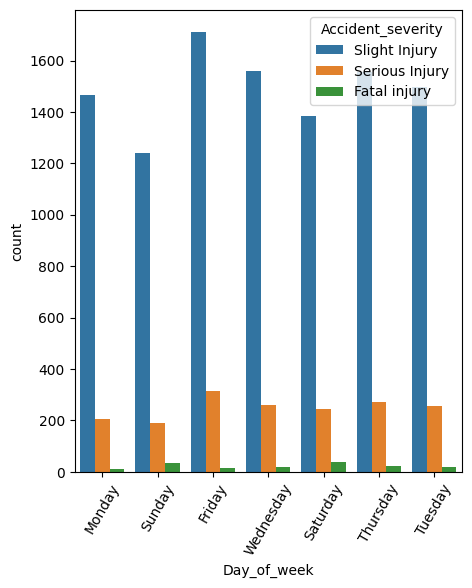

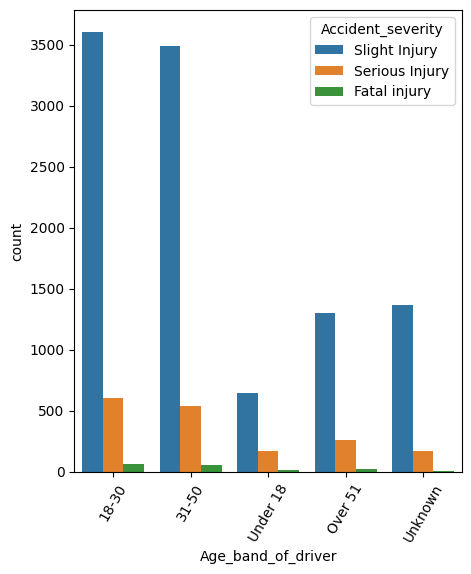

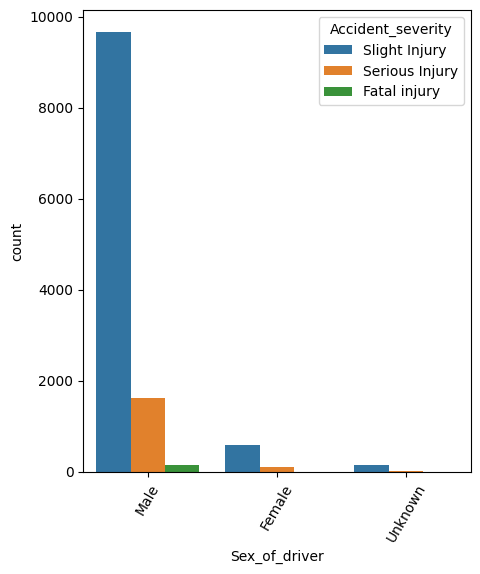

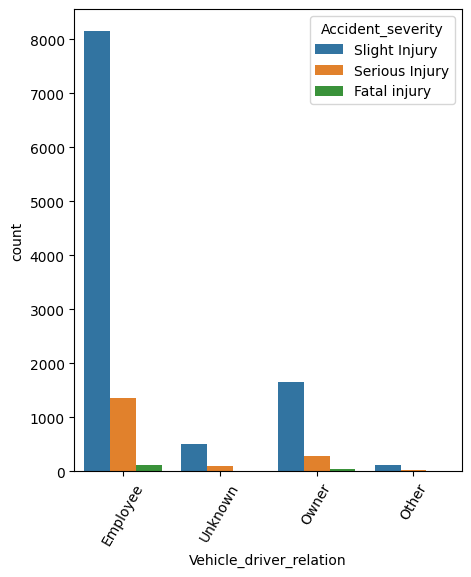

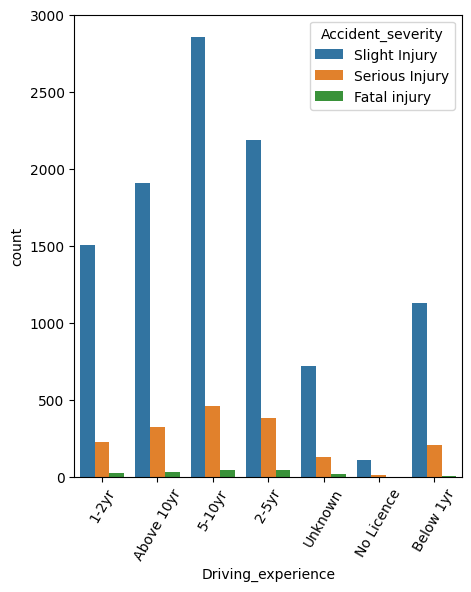

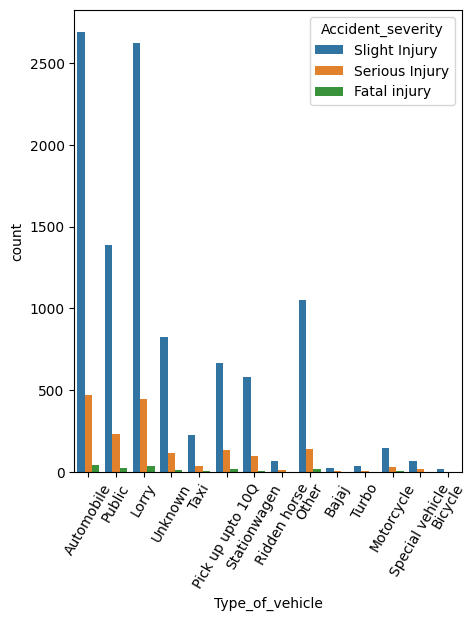

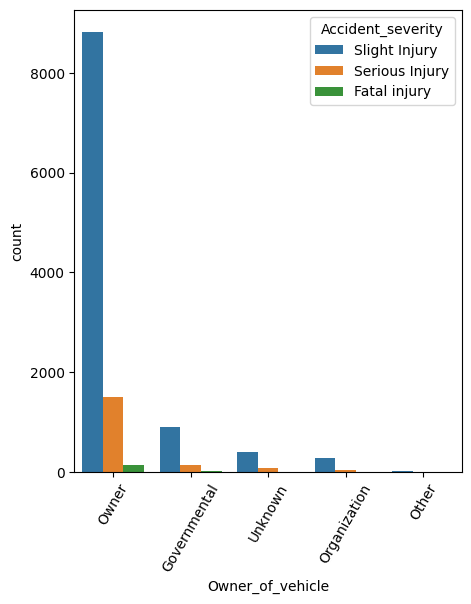

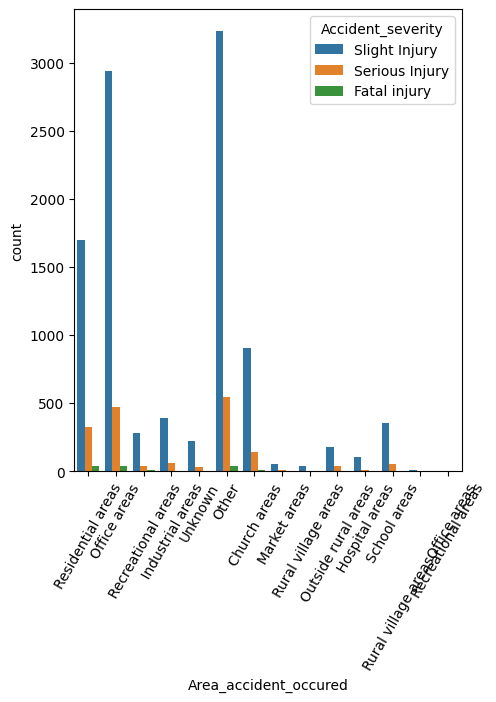

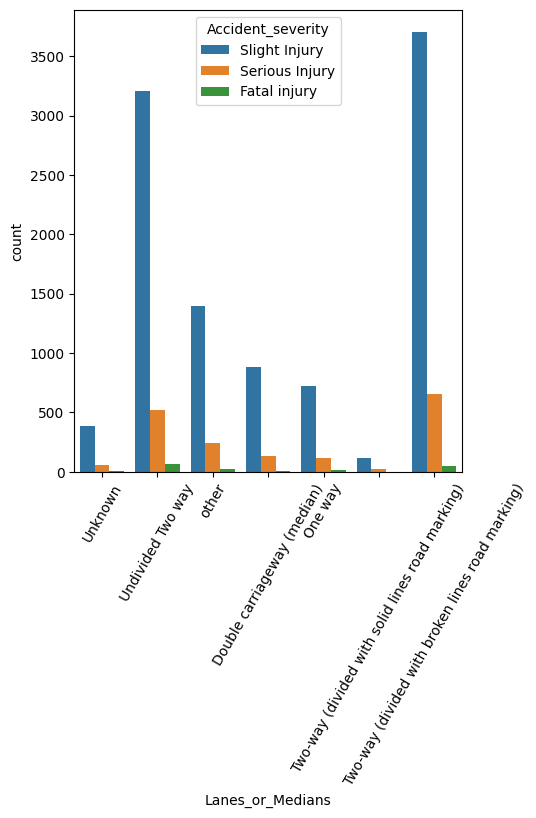

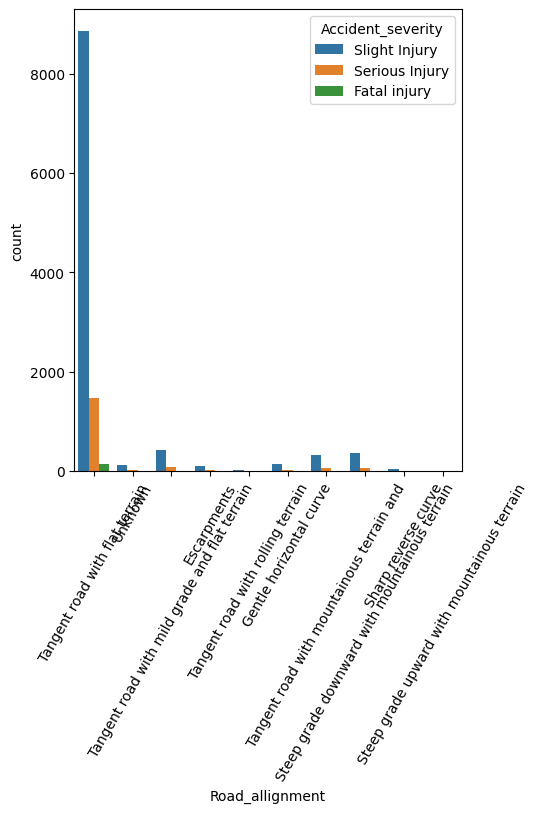

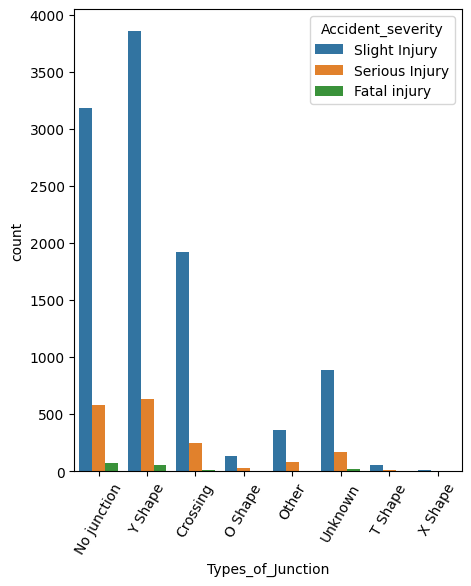

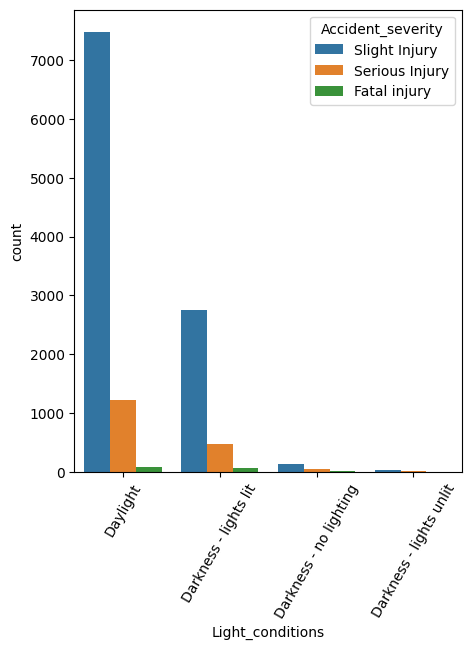

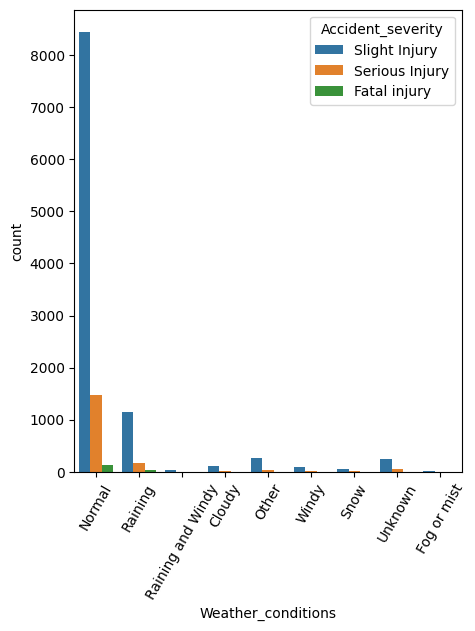

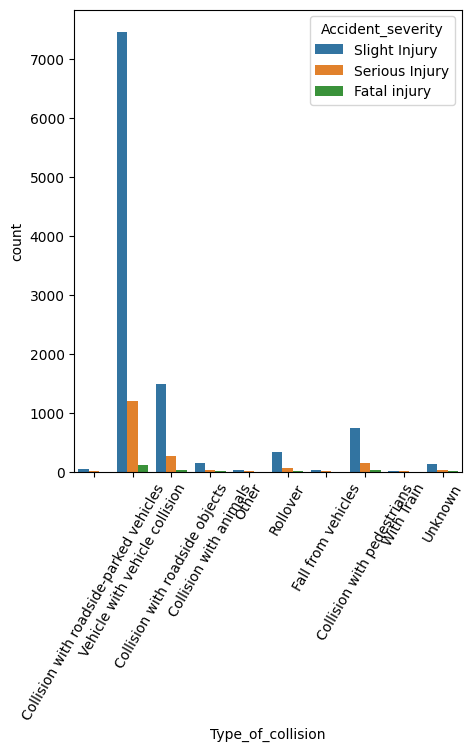

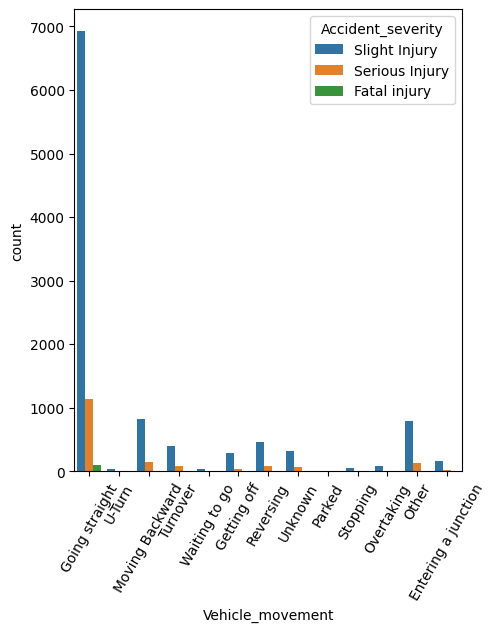

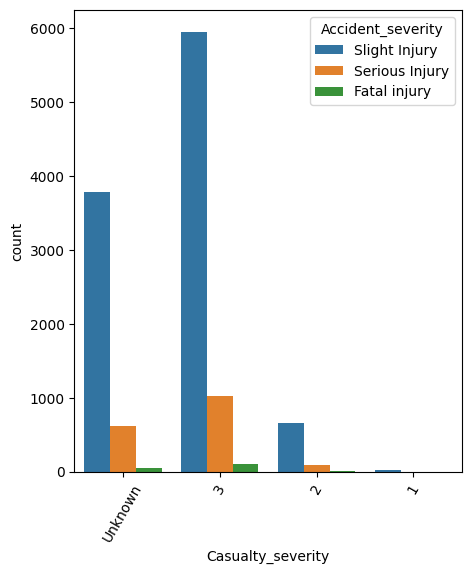

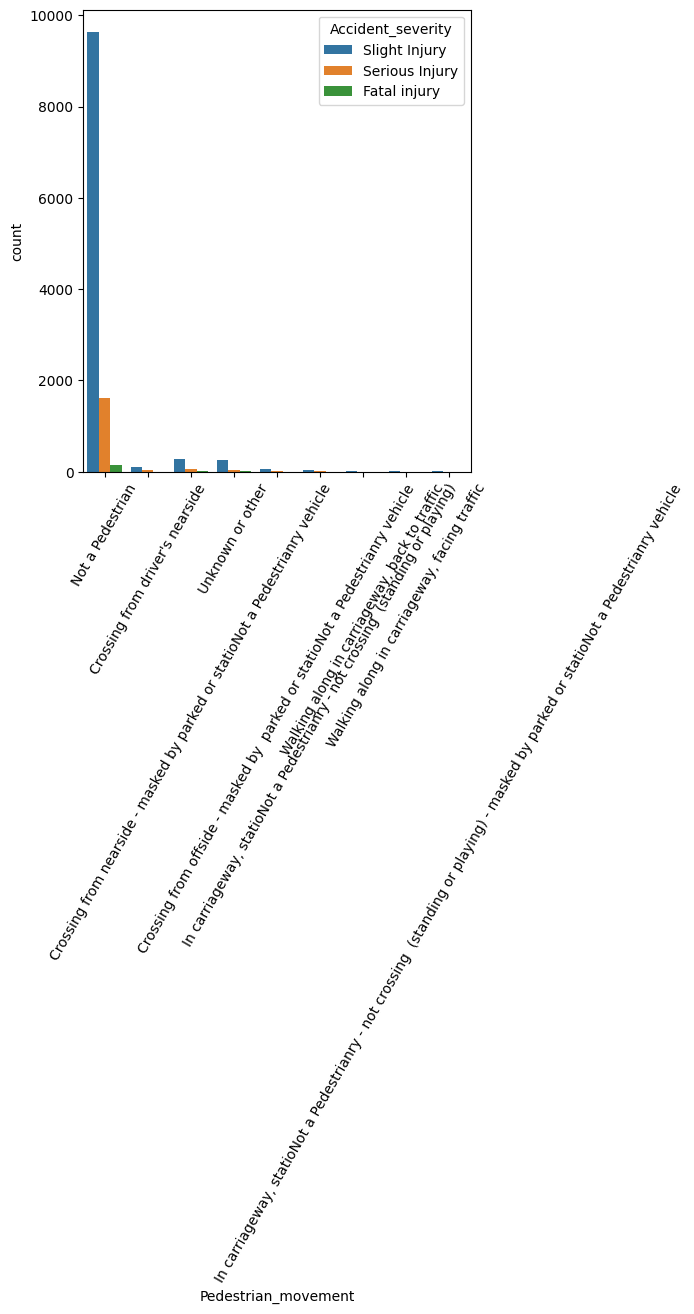

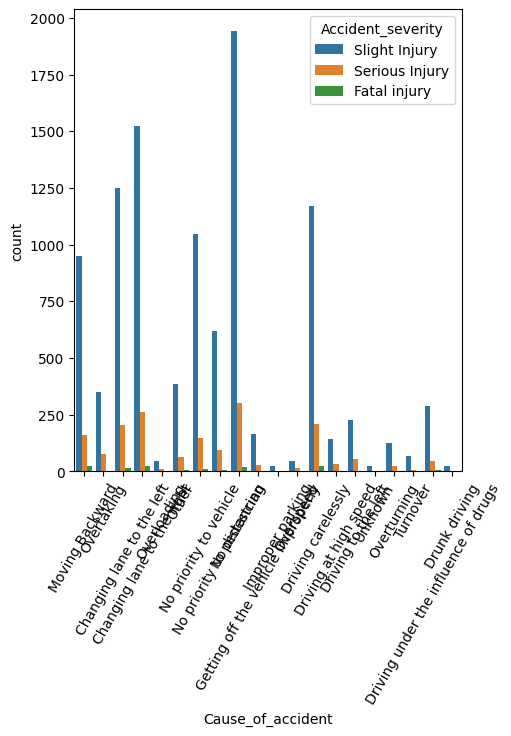

In [96]:
def countPlots(col):
    dataframe[col].value_counts()
    plt.figure(figsize=(5,6))
    sns.countplot(x=col, hue='Accident_severity', data=dataframe)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show

#using categorical array from above
for col in categorical:
    #excluding road surface , road conditions, Accident_severity and education level as already visualized above
    if(col!='Road_surface_type' and col!='Road_surface_conditions' and col!='Educational_level' and col!='Accident_severity'):
        countPlots(col)


<Figure size 500x500 with 0 Axes>

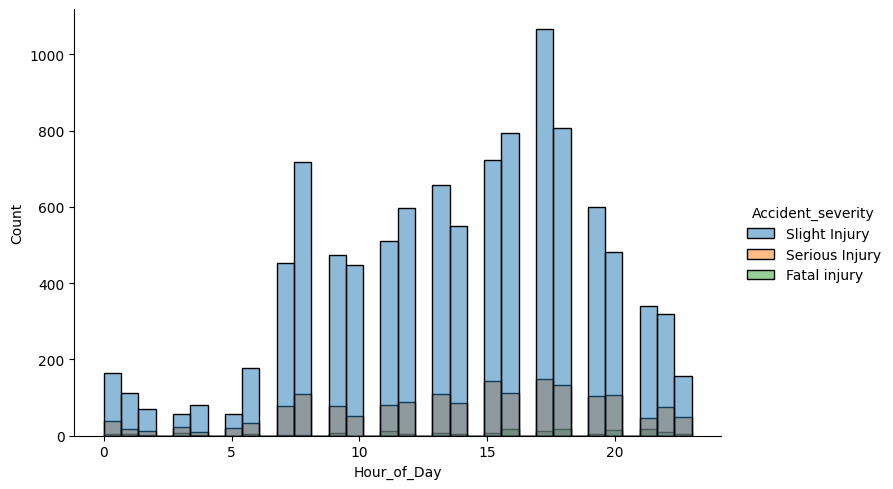

In [97]:
# disribution for hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=dataframe, aspect=1.5)
plt.show()

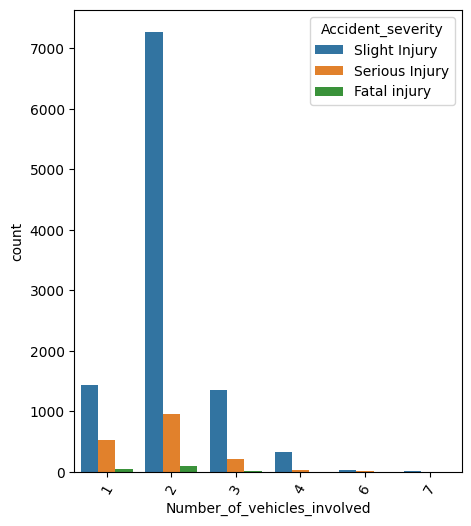

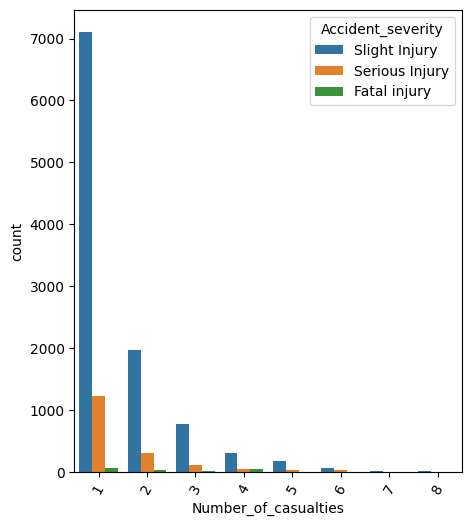

In [98]:
#Visulizing numerical cols wrt to accident severity
numerical_cols = ["Number_of_vehicles_involved", 'Number_of_casualties']

#using categorical array from above
for col in numerical_cols:
    countPlots(col)



<Axes: >

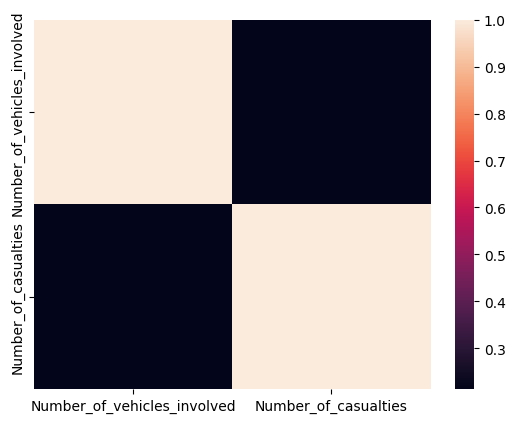

In [99]:
# showing relationship between number of vehicles and number of casualties
numerical_df = dataset.filter(["Number_of_vehicles_involved", 'Number_of_casualties'], axis=1)
sns.heatmap(numerical_df.corr())

# there seems to be no relationship between these two

1) Data is highly imbalanced
2) Hour of day seems to be important to predict accident severity
3) categorical cols need to be encoded
4) chi square analysis need to be done for feature selection

3 - Feature Selection

In [100]:
features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Hour_of_Day']

feature_dataframe = dataframe[features]
target = dataframe['Accident_severity']
numerical_df = dataset.filter(["Number_of_vehicles_involved", 'Number_of_casualties'], axis=1)


In [101]:
#new feature dataframe info
feature_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              12316 non-null  object
 1   Age_band_of_driver       12316 non-null  object
 2   Sex_of_driver            12316 non-null  object
 3   Educational_level        12316 non-null  object
 4   Vehicle_driver_relation  12316 non-null  object
 5   Driving_experience       12316 non-null  object
 6   Type_of_vehicle          12316 non-null  object
 7   Owner_of_vehicle         12316 non-null  object
 8   Area_accident_occured    12316 non-null  object
 9   Lanes_or_Medians         12316 non-null  object
 10  Road_allignment          12316 non-null  object
 11  Types_of_Junction        12316 non-null  object
 12  Road_surface_type        12316 non-null  object
 13  Road_surface_conditions  12316 non-null  object
 14  Light_conditions         12316 non-nul

In [102]:
#encoding into dummy variables using get dummies
x = feature_dataframe[features]
y = target
encoded_df = pd.get_dummies(x, dtype='int', drop_first=True)
encoded_df.shape
display(encoded_df)

,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12312,18,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,13,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12314,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#target encoding using label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y)
print("Encoded labels:",label_encoder.classes_)
target_en= label_encoder.fit_transform(y)
target_en

# 1: serious injury, 2: Slight injury, 0: Fatal Injury


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


array([2, 2, 1, ..., 1, 2, 2])

In [104]:
feature_df = pd.concat([encoded_df, numerical_df], axis="columns")
feature_list = list(feature_df.columns)
feature_df

,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
0,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,17,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2,2
2,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,2,1
12312,18,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
12313,13,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
12314,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1


Modelling


In [105]:
# Imbalance data treatment

oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(feature_df, target_en)
y_smoted = pd.Series(y_smoted)
X_smoted.shape, y_smoted.shape


((31245, 152), (31245,))

In [106]:
y_smoted.value_counts()

2    10415
1    10415
0    10415
Name: count, dtype: int64

<Axes: xlabel='None', ylabel='count'>

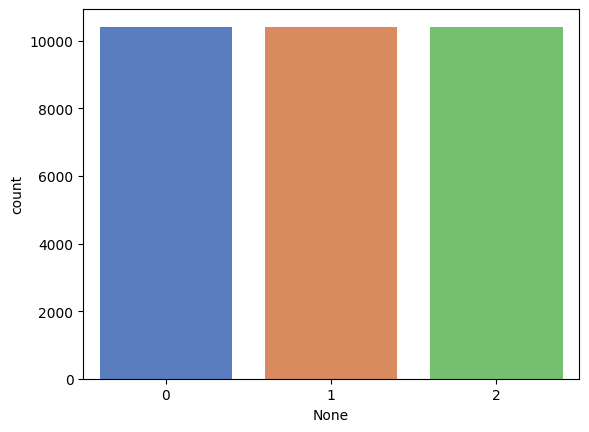

In [107]:
sns.countplot(x = y_smoted, palette='muted')

In [108]:
# train and test split
X_trn, X_tst, y_trn, y_tst = train_test_split(X_smoted, y_smoted, test_size=0.25, random_state=42)

print('Training Features Shape:', X_trn.shape)
print('Training Labels Shape:', y_trn.shape)
print('Testing Featured Shape:', X_tst.shape)
print('Testing Labels Shape:', y_tst.shape)

#to store all models results
models={}


Training Features Shape: (23433, 152)
Training Labels Shape: (23433,)
Testing Featured Shape: (7812, 152)
Testing Labels Shape: (7812,)


train score :  0.9961165877181752
f1 score for RandomForestClassifier:  0.9368694615663047
classification for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2599
           1       0.95      0.87      0.91      2639
           2       0.88      0.96      0.91      2574

    accuracy                           0.94      7812
   macro avg       0.94      0.94      0.94      7812
weighted avg       0.94      0.94      0.94      7812



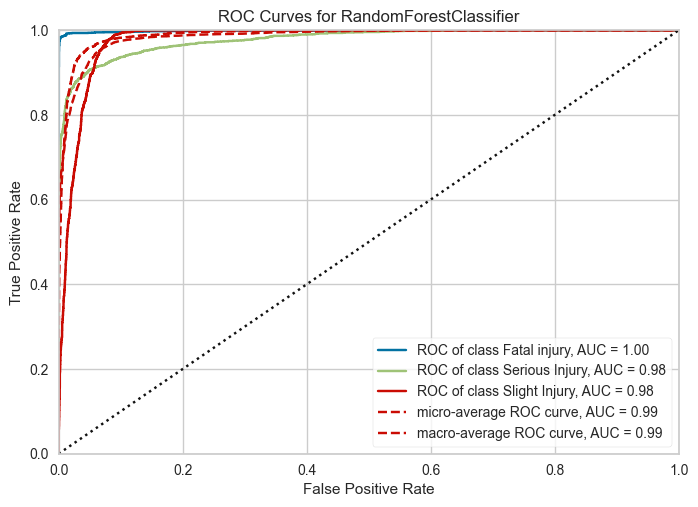

In [122]:
def accuracyAndClassif(modelinstance, predics, modelname, printresults ):
    # train score 
    train_score = modelinstance.score(X_trn, y_trn)

    classif_svc = classification_report(y_tst,predics)

    f1score = f1_score(y_tst, predics, average='weighted')
    accuracy = accuracy_score(y_tst, predics, normalize=True, sample_weight=None)
    models[modelname] = {'accuracy':accuracy, 'f1score':f1score}

    if(printresults==True):
        print('train score : ', train_score)
        print(f'f1 score for {modelname}: ',f1score)
        print(f'classification for {modelname}')
        print(classif_svc)

        #visualizing ROC curves for each target class
        visualizer = ROCAUC(modelinstance, classes=label_encoder.classes_)
        visualizer.fit(X_trn, y_trn)        # Fit the training data to the visualizer
        visualizer.score(X_tst, y_tst)        # Evaluate the model on the test data
        visualizer.show() 


    
    return accuracy, f1score

# modelling using random forest
def randomForestClassifier(X_trn, y_trn, X_tst, y_tst):
    rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
    rf.fit(X_trn, y_trn)
    # predicting on test data
    predics = rf.predict(X_tst)
    accuracyAndClassif(rf, predics, 'RandomForestClassifier', True )
    return rf

rf = randomForestClassifier(X_trn, y_trn, X_tst, y_tst)

In [123]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Feature: Hour_of_Day          Importance: 0.075
Feature: Number_of_casualties Importance: 0.072
Feature: Number_of_vehicles_involved Importance: 0.052
Feature: Light_conditions_Daylight Importance: 0.025
Feature: Lanes_or_Medians_Two-way (divided with broken lines road marking) Importance: 0.023
Feature: Driving_experience_5-10yr Importance: 0.02
Feature: Vehicle_movement_Going straight Importance: 0.02
Feature: Age_band_of_driver_Unknown Importance: 0.019
Feature: Educational_level_Junior high school Importance: 0.019
Feature: Type_of_vehicle_Lorry Importance: 0.019
Feature: Area_accident_occured_Other Importance: 0.019
Feature: Type_of_collision_Vehicle with vehicle collision Importance: 0.019
Feature: Casualty_severity_Unknown Importance: 0.019
Feature: Cause_of_accident_No distancing Importance: 0.019
Feature: Area_accident_occured_Office areas Importance: 0.018
Feature: Casualty_severity_3  Importance: 0.018
Feature: Age_band_of_driver_31-50 Importance: 0.017
Feature: Types_of_Jun

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [124]:
#selecting features based on random forest classifier importance
feature_scores = pd.Series(rf.feature_importances_, index=X_trn.columns).sort_values(ascending=False)

feature_scores_selected=feature_scores.loc[lambda x : (x >= 0.001)]
rf_features_selected = feature_scores_selected.index.values


print(rf_features_selected)
print('total features selected',len(rf_features_selected))


['Hour_of_Day' 'Number_of_casualties' 'Number_of_vehicles_involved'
 'Light_conditions_Daylight'
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)'
 'Vehicle_movement_Going straight' 'Driving_experience_5-10yr'
 'Casualty_severity_Unknown' 'Educational_level_Junior high school'
 'Type_of_collision_Vehicle with vehicle collision'
 'Cause_of_accident_No distancing' 'Age_band_of_driver_Unknown'
 'Area_accident_occured_Other' 'Type_of_vehicle_Lorry'
 'Casualty_severity_3' 'Area_accident_occured_Office areas'
 'Age_band_of_driver_31-50' 'Types_of_Junction_Y Shape'
 'Lanes_or_Medians_Undivided Two way'
 'Road_surface_conditions_Wet or damp' 'Driving_experience_Above 10yr'
 'Types_of_Junction_No junction' 'Educational_level_Elementary school'
 'Day_of_week_Sunday' 'Cause_of_accident_Changing lane to the right'
 'Road_allignment_Tangent road with flat terrain'
 'Driving_experience_Below 1yr' 'Day_of_week_Thursday'
 'Owner_of_vehicle_Owner' 'Day_of_week_Monday' 'Driving_experi

train score :  0.9963726368796142
f1 score for RandomForestClassifier:  0.9374288865400472
classification for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2599
           1       0.94      0.88      0.91      2639
           2       0.88      0.95      0.91      2574

    accuracy                           0.94      7812
   macro avg       0.94      0.94      0.94      7812
weighted avg       0.94      0.94      0.94      7812



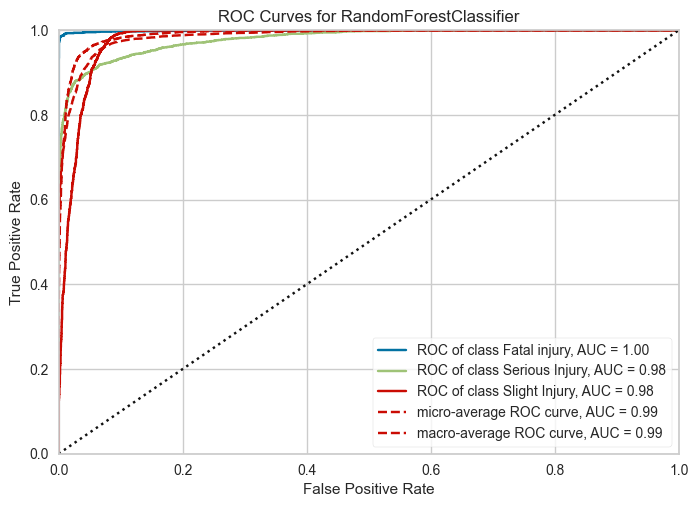

RandomForestClassifier(max_depth=20, n_estimators=800, random_state=42)

In [127]:
#updating training and test data with only new features
X_trn = X_trn[rf_features_selected]
X_tst = X_tst[rf_features_selected]
randomForestClassifier(X_trn, y_trn, X_tst, y_tst)

In [128]:
#implementing knn classfier
def knnClassifier(k, printResults):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trn, y_trn)
    # predicting on test data
    predics = knn.predict(X_tst)

    accuracy, f1score = accuracyAndClassif(knn, predics, 'knnClassifier', printResults)
    print(f'For k={k} accuracy: {accuracy} and f1score : {f1score}')


for k in range(1,30):
    knnClassifier(k, False)


For k=1 accuracy: 0.8239887352790578 and f1score : 0.8073730501040146
For k=2 accuracy: 0.7439836149513569 and f1score : 0.6943792886786088
For k=3 accuracy: 0.7717613927291347 and f1score : 0.7362647260619558
For k=4 accuracy: 0.7259344598054276 and f1score : 0.6689497424254183
For k=5 accuracy: 0.7405273937532002 and f1score : 0.6912150715849528
For k=6 accuracy: 0.7103174603174603 and f1score : 0.6465766707872196
For k=7 accuracy: 0.7224782386072709 and f1score : 0.6650760622039535
For k=8 accuracy: 0.6991807475678443 and f1score : 0.6297167534273705
For k=9 accuracy: 0.7073732718894009 and f1score : 0.6421103720245117
For k=10 accuracy: 0.6863799283154122 and f1score : 0.611466951648852
For k=11 accuracy: 0.6917562724014337 and f1score : 0.618667007067146
For k=12 accuracy: 0.677931387608807 and f1score : 0.5991342550597366
For k=13 accuracy: 0.6844598054275474 and f1score : 0.6093143915467459
For k=14 accuracy: 0.6693548387096774 and f1score : 0.5882025154484791
For k=15 accuracy:

train score :  1.0
f1 score for knnClassifier:  0.8073730501040146
classification for knnClassifier
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2599
           1       0.70      0.99      0.82      2639
           2       0.99      0.48      0.65      2574

    accuracy                           0.82      7812
   macro avg       0.87      0.82      0.81      7812
weighted avg       0.87      0.82      0.81      7812



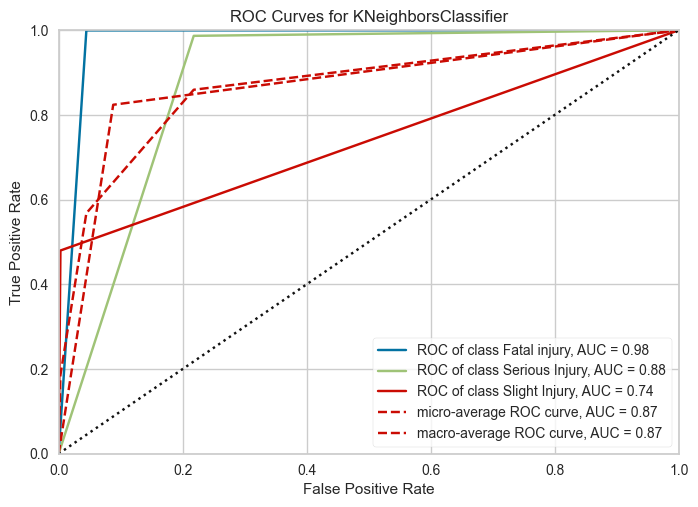

For k=1 accuracy: 0.8239887352790578 and f1score : 0.8073730501040146


In [129]:
#from above we run for k=1 and see detailed results
knnClassifier(1, True)

train score :  0.7703665770494602
f1 score for AdaBoostClassifier:  0.7558137052537071
classification for AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2599
           1       0.65      0.66      0.65      2639
           2       0.84      0.87      0.85      2574

    accuracy                           0.76      7812
   macro avg       0.76      0.76      0.76      7812
weighted avg       0.76      0.76      0.76      7812



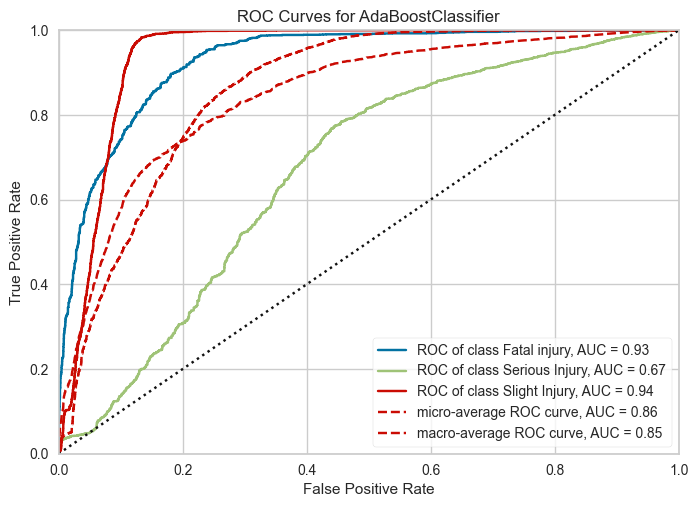

In [130]:
#ada boost classifier

def adaBoostClassifier():
    ada = AdaBoostClassifier(n_estimators=800, learning_rate=1, random_state=100)
    ada.fit(X_trn, y_trn)

    # predicting on test data
    predics = ada.predict(X_tst)

    accuracyAndClassif(ada, predics, 'AdaBoostClassifier', True)

adaBoostClassifier()

train score :  0.9996159262578415
f1 score for GradientBoostingClassifier:  0.910401360337302
classification for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2599
           1       0.89      0.86      0.87      2639
           2       0.85      0.89      0.87      2574

    accuracy                           0.91      7812
   macro avg       0.91      0.91      0.91      7812
weighted avg       0.91      0.91      0.91      7812



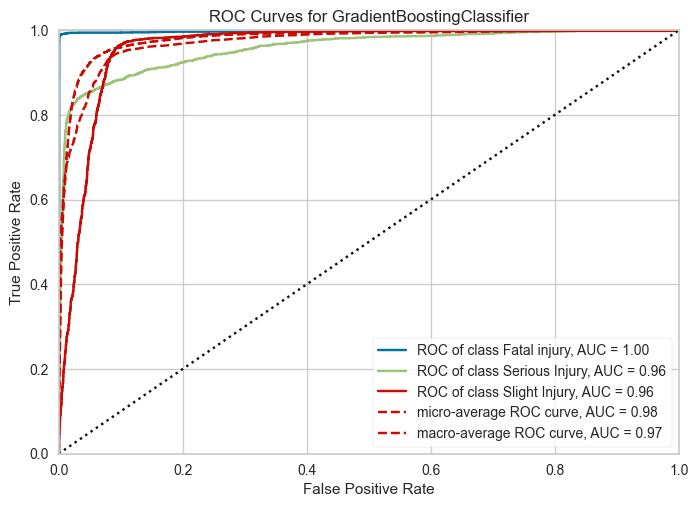

In [131]:
#gradient boosting classifier

def gradientBoostingClassifier():
    gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=1, random_state=100)
    gbc.fit(X_trn, y_trn)
    # predicting on test data
    predics = gbc.predict(X_tst)

    accuracyAndClassif(gbc, predics, 'GradientBoostingClassifier', True)

gradientBoostingClassifier()

train score :  0.8255451713395638
f1 score for SupportVectorMachine:  0.819591465288678
classification for SupportVectorMachine
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2599
           1       0.81      0.65      0.72      2639
           2       0.83      0.97      0.89      2574

    accuracy                           0.82      7812
   macro avg       0.82      0.83      0.82      7812
weighted avg       0.82      0.82      0.82      7812



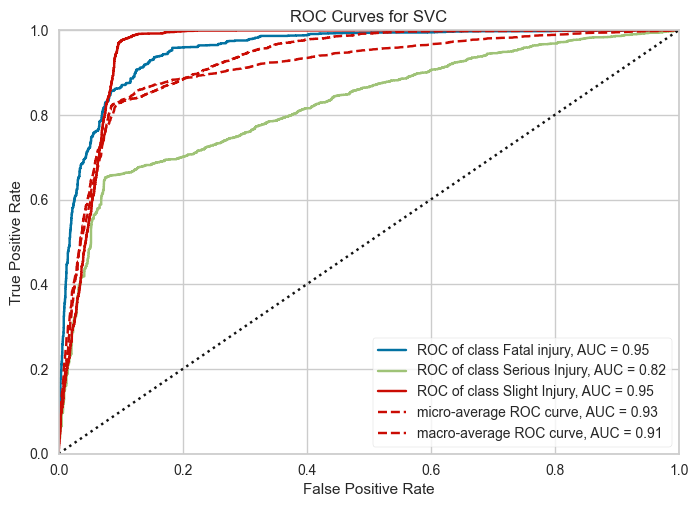

In [132]:
#Support vector modelling

def SVM():
    svc=SVC()
    svc.fit(X_trn, y_trn)
    # predicting on test data
    predics = svc.predict(X_tst)

    accuracyAndClassif(svc, predics, 'SupportVectorMachine', True)

SVM()

train score :  0.9023599197712627
f1 score for decision-tree-gini:  0.8328568582544601
classification for decision-tree-gini
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2599
           1       0.77      0.78      0.78      2639
           2       0.80      0.74      0.77      2574

    accuracy                           0.83      7812
   macro avg       0.83      0.83      0.83      7812
weighted avg       0.83      0.83      0.83      7812



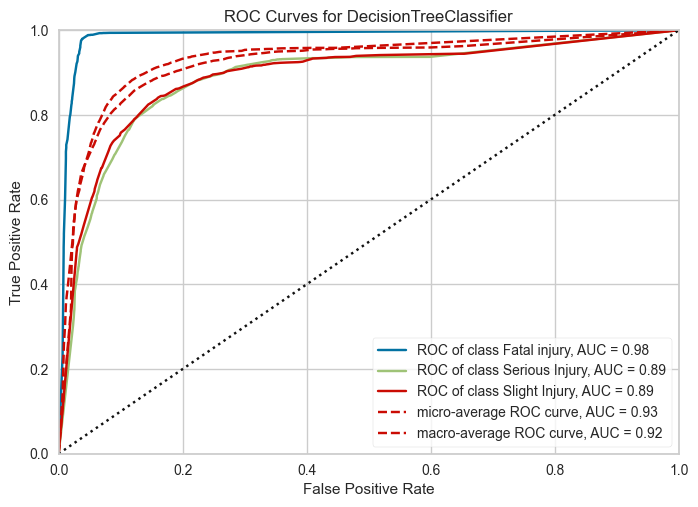

train score :  0.8906670080655485
f1 score for decision-tree-entropy:  0.8180005476263164
classification for decision-tree-entropy
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2599
           1       0.77      0.73      0.75      2639
           2       0.81      0.74      0.77      2574

    accuracy                           0.82      7812
   macro avg       0.82      0.82      0.82      7812
weighted avg       0.82      0.82      0.82      7812



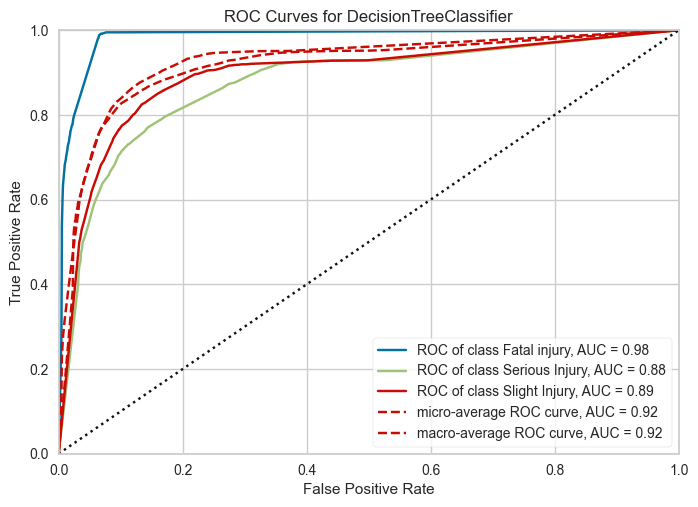

In [133]:

def DecisionTreeClassifierModel(X_tst):
    dtc_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=20, min_samples_leaf=5)
    dtc_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 20, min_samples_leaf = 5)

    dtc_gini.fit(X_trn, y_trn)
    dtc_entropy.fit(X_trn, y_trn)
    # predicting on test data
    predics_gini = dtc_gini.predict(X_tst)
    predics_entropy = dtc_entropy.predict(X_tst)
    accuracyAndClassif(dtc_gini, predics_gini, 'decision-tree-gini', True)
    accuracyAndClassif(dtc_entropy, predics_entropy, 'decision-tree-entropy', True)

DecisionTreeClassifierModel(X_tst)

In [134]:
#comparing all models scores

alg=[]
acc=[]
f1scores=[]
for key in models:
    alg.append(key)
    acc.append(models[key]['accuracy'])
    f1scores.append(models[key]['f1score'])

Accuracy_Scores=pd.DataFrame({'Algorithms':alg, 'Accuracy': acc, 'f1scores': f1scores})
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy,f1scores
0,RandomForestClassifier,0.937404,0.937429
3,GradientBoostingClassifier,0.910394,0.910401
5,decision-tree-gini,0.834613,0.832857
4,SupportVectorMachine,0.824885,0.819591
1,knnClassifier,0.823989,0.807373
6,decision-tree-entropy,0.821557,0.818001
2,AdaBoostClassifier,0.756272,0.755814


In [135]:
#cross validation for randomforestclassifier
# cv indocates folds in startifiedKfolds technique
score = cross_val_score(RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42),X_smoted, y_smoted,scoring='accuracy', cv=10)
print(f'score are {score}')
print(f'score mean: {score.mean()}')

score are [0.712      0.83328    0.96768    0.98368    0.98112    0.98111396
 0.98047375 0.97823303 0.97631242 0.97471191]
score mean: 0.9368605070422535
